## Importing libraries

In [1]:
# For mathematical operations
import numpy as np

# For data analysis
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For encoding categorical variables
from sklearn.preprocessing import LabelEncoder

# For splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# For calculating metrics of the model
from sklearn.metrics import confusion_matrix, f1_score, classification_report, accuracy_score

from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier

# For plotting the decision tree
from sklearn.tree import plot_tree

# For ensemble modelling
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

## Loading dataset

In [2]:
df = pd.read_csv('datasets/weatherAUS.csv')

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Find the shape of dataset

df.shape

(145460, 23)

<b> The dataset has 1,45,460 records and 23 attributes. </b>

In [5]:
# Find the datatype of each attribute

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

<b> The dataset has 16 float and 7 object columns. </b>

In [6]:
# Convert datatype of date object to datetime

df['Date'] = pd.to_datetime(df['Date'])

### Attribute Description:-

<ol>
    <li>Date - The date of observation</li>
    <li>Location - The common name of the location of the weather station</li>
    <li>MinTemp - The minimum temperature in degrees celsius</li>
    <li>MaxTemp - The maximum temperature in degrees celsius</li>
    <li>Rainfall - The amount of rainfall recorded for the day in mm</li>
    <li>Evaporation - The so-called Class A pan evaporation (mm) in the 24 hours to 9am</li>
    <li>Sunshine - The number of hours of bright sunshine in the day.</li>
    <li>WindGustDir - The direction of the strongest wind gust in the 24 hours to midnight</li>
    <li>WindGustSpeed - The speed (km/h) of the strongest wind gust in the 24 hours to midnight</li>
    <li>WindDir9am - Direction of the wind at 9am</li>
    <li>WindDir3pm - Direction of the wind at 3pm</li>
    <li>WindSpeed9am - Wind speed (km/hr) averaged over 10 minutes prior to 9am</li>
    <li>WindSpeed3pm - Wind speed (km/hr) averaged over 10 minutes prior to 3pm</li>
    <li>Humidity9am - Humidity (percent) at 9am</li>
    <li>Humidity3pm - Humidity (percent) at 3pm</li>
    <li>Pressure9am - Atmospheric pressure (hpa) reduced to mean sea level at 9am</li>
    <li>Pressure3pm - Atmospheric pressure (hpa) reduced to mean sea level at 3pm</li>
    <li>Cloud9am - Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.</li>
    <li>Cloud3pm - Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values</li>
    <li>Temp9am - Temperature (degrees C) at 9am</li>
    <li>Temp3pm - Temperature (degrees C) at 3pm</li>
    <li>RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0</li>
    <li>RainTomorrow - The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".</li>
</ol>

In [7]:
# Statistics for numeric attributes

df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


<b> Simple statistics like count, mean, min, max, etc is calculated for attributes having numeric datatype.<br>
Some of the conclusions drawn from the above table are:<br> </b>
<ol>
    <li>The average minimum temperature is 12.194 and average maximum temperature is 23.221 degree Celcius.</li>
    <li>The mean rainfall is 2.36 mm.</li>
    <li>The average sunshine recieved is 7.61 hour.</li>
    <li>The average wind gust speed is 40.035 km/hr.</li>
    <li>The minimum temperature recorded is -8.5 degree Celcius and the maximum recorded temperature is 48.1 degree Celcius.</li>
    <li>The minimum rainfall recorded for a particular day is 0 mm and maximum is 371 mm.</li>
    <li>The median evaporation is 4.8 mm.</li>
</ol>

In [8]:
# Statistics for object attributes

df.describe(include="object")

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,135134,134894,141232,142199,142193
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,9915,11758,10838,110319,110316


<b> The statistics displayed for the attributes of 'object' datatype is different from the one displayed for numeric datatypes.<br>
Some of the conclusions drawn from the above table are:<br> </b>
<ol>
    <li>There are total 49 unique locations and 16 unique wind directions.</li>
    <li>RainToday and RainTomorrow attribute has 2 unique values.</li>
    <li>The top location is Canberra occuring 3436 times.</li>
</ol>

In [9]:
# Check for duplicates

duplicate = df[df.duplicated()]
duplicate

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


<b> No duplicate records are present. </b>

In [10]:
# Check for null values

df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

<b>Observations:-</b>
<ol>
    <li>Maximum null values are present in Sunshine column followed by Evaporation.</li>
    <li>More than 55,000 null values are present in Cloud9am and Cloud3pm columns.</li>
    <li>Around 15,000 null values are present in Pressure9am and Pressure3pm columns.</li>
    <li>More than 10,000 null values are present in WindGustDir, WindGustSpeed  and WindDir9am columns</li>
    <li>There are many columns having more than 1000 null records.</li>
</ol>

In [11]:
# Drop Sunshine, Evaporation, Cloud9am and Cloud3pm as most of the values are null

col = ['Sunshine', 'Evaporation', 'Cloud9am', 'Cloud3pm']
df.drop(col, axis=1, inplace=True)

In [12]:
# Replace numerical columns with median
def replace_numerical(df):
    for col in df.select_dtypes(['int', 'float']):
        df[col] = df[col].fillna(df[col].median())
    return df

# Replace object columns with mode
def replace_object(df):
    for col in df.select_dtypes('object'):
        df[col] = df[col].fillna(method='ffill')
    return df

In [13]:
df = replace_numerical(df)
df = replace_object(df)

In [14]:
# Check again if any null values are present

df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<b>Hence, all null records are removed from the dataset.</b>

## Exploratory Data Analysis

In [15]:
# PLot Correlation Matrix

corr = df.corr()
corr.style.background_gradient(cmap='PuBu').set_precision(2)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
MinTemp,1.00,0.73,0.10,0.17,0.17,0.17,-0.23,0.01,-0.42,-0.43,0.90,0.70
MaxTemp,0.73,1.00,-0.07,0.07,0.01,0.05,-0.50,-0.50,-0.31,-0.40,0.88,0.97
Rainfall,0.10,-0.07,1.00,0.13,0.08,0.06,0.22,0.25,-0.16,-0.12,0.01,-0.08
WindGustSpeed,0.17,0.07,0.13,1.00,0.58,0.66,-0.21,-0.03,-0.43,-0.38,0.15,0.03
WindSpeed9am,0.17,0.01,0.08,0.58,1.00,0.51,-0.27,-0.03,-0.22,-0.17,0.13,0.00
WindSpeed3pm,0.17,0.05,0.06,0.66,0.51,1.00,-0.14,0.02,-0.28,-0.24,0.16,0.03
Humidity9am,-0.23,-0.50,0.22,-0.21,-0.27,-0.14,1.00,0.66,0.13,0.18,-0.47,-0.49
Humidity3pm,0.01,-0.50,0.25,-0.03,-0.03,0.02,0.66,1.00,-0.03,0.05,-0.22,-0.56
Pressure9am,-0.42,-0.31,-0.16,-0.43,-0.22,-0.28,0.13,-0.03,1.00,0.96,-0.40,-0.27
Pressure3pm,-0.43,-0.40,-0.12,-0.38,-0.17,-0.24,0.18,0.05,0.96,1.00,-0.44,-0.36


<b>Observation:-</b>

<ul>
    <li>MaxTemp and Temp3pm have a strong positive correlation of 0.97.</li>
    <li>Pressure9am and Pressure3pm have a strong positive correlation of 0.96.</li>
    <li>MinTemp and Temp9am have a strong positive correlation of 0.90.</li>
    <li>MaxTemp and Temp9am have a strong positive correlation of 0.88.</li>
    <li>Temp9am and Temp3pm have a strong positive correlation of 0.85.</li>
    <li>Humidity and Temperature attributes have a negative correlation of 0.50.</li>
</ul>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

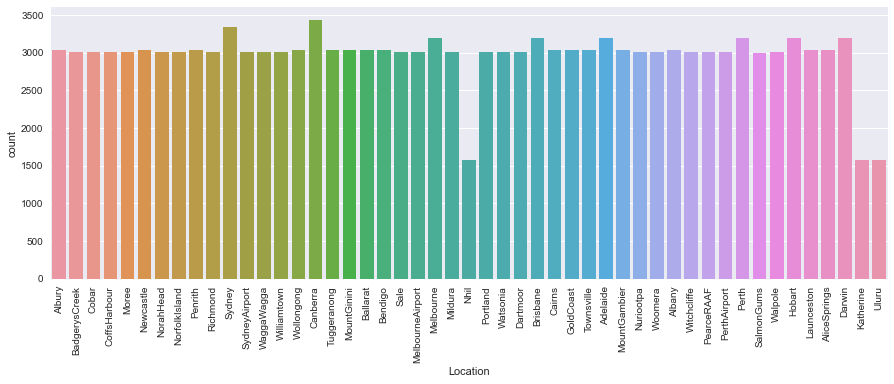

In [16]:
plt.style.use('seaborn')

# Distribution of location

plt.figure(figsize=(15, 5))
sns.countplot(df['Location'])
plt.xticks(rotation=90)

<b>Observation:-</b>

<ul>
    <li>Most occured location is Canberra followed by Sydney.</li>
    <li>Most of the locations have a frequency near 3000.</li>
    <li>Nhil, Katherine and Uluru have occured the least.</li>
</ul>

Text(0.5, 1.0, 'Maximum Temperature')

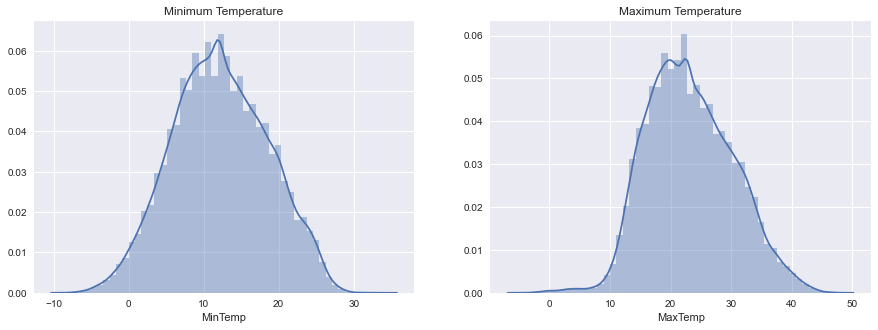

In [17]:
# Distribution of MinTemp and MaxTemp

fig, ax = plt.subplots(1, 2, figsize=(15,5))

# MinTemp
sns.distplot(df['MinTemp'], ax=ax[0])
ax[0].set_title("Minimum Temperature")

# MaxTemp
sns.distplot(df['MaxTemp'], ax=ax[1])
ax[1].set_title("Maximum Temperature")

<b>Observation:-</b>

<ul>
    <li>Highest concentration of points for minimum temperature is between 10 to 12 degree Celcius.</li>
    <li>Highest concentration of points for maximum temperature is between 18 to 22 degree Celcius.</li>
</ul>

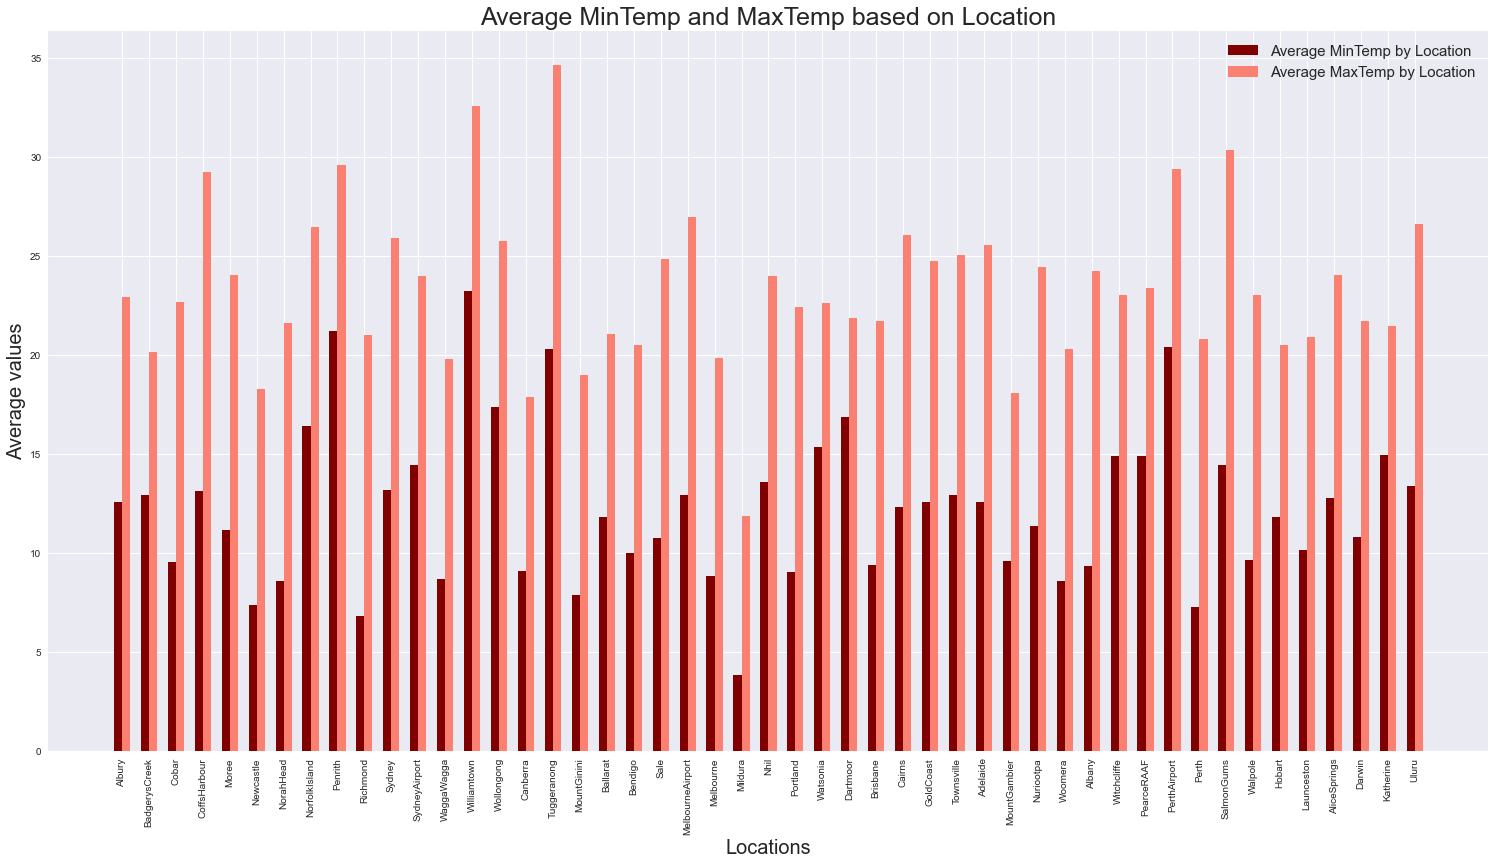

In [18]:
# MinTemp and MaxTemp of each location

a = df.groupby('Location').agg({'MinTemp':'mean'})
c = df.groupby('Location').agg({'MaxTemp':'mean'})
plt.rcParams["figure.figsize"] = (20,10)

n = df['Location'].nunique()
x = np.arange(n)

loc = df['Location'].unique()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

w = 0.3

ax.bar(x-w/2, a[:]['MinTemp'], label='Average MinTemp by Location', color='maroon', width=w)
ax.bar(x+w/2, c[:]['MaxTemp'], label='Average MaxTemp by Location', color='salmon', width=w)

ax.set_xticks(x)
ax.set_xticklabels(loc, rotation=90)

plt.xlabel('Locations', fontsize=20)
plt.ylabel('Average values', fontsize=20)
plt.title('Average MinTemp and MaxTemp based on Location', fontsize=25)
plt.legend(fontsize=15)

<b>Observation:-</b>

<ul>
    <li>The average maximum temperature is above 20 degree Celcius for most locations.</li>
    <li>The average minimum temperature is between 5 and 15 degree Celcius for most locations.</li>
</ul>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

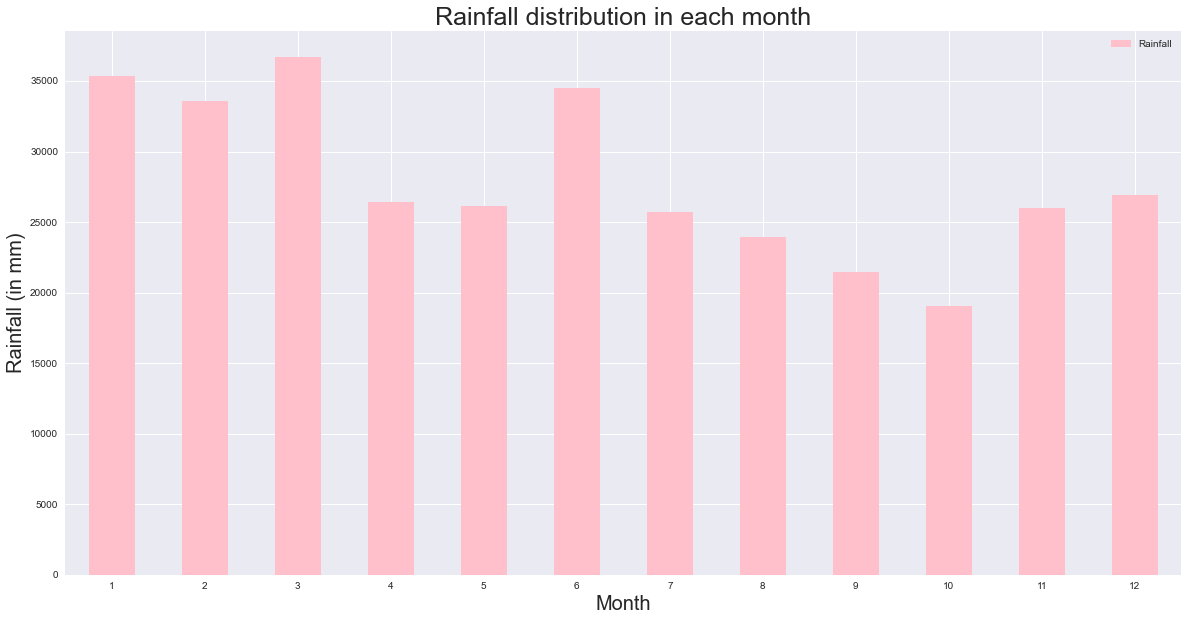

In [19]:
# Rainfall distribution in each month

# Create a new dataframe rain_df
rainfall =[df['Date'].dt.year, df['Date'].dt.month, df['Rainfall']]
headers = ['Year', 'Month', 'Rainfall']
rain_df = pd.concat(rainfall, axis=1, keys=headers)

plt.figure(figsize=(8,4))
a = rain_df.groupby('Month').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='pink')
plt.title('Rainfall distribution in each month', fontsize=25)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

<b>Observation:-</b>

<ul>
    <li>Maximum rainfall(greater than 35,000 mm) occurs in March.</li>
    <li>January and June also experience high rainfall(nearly 35,000 mm) followed by February.</li>
    <li>Minimum rainfall occurs in October followed by September.</li>
</ul>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

<Figure size 576x288 with 0 Axes>

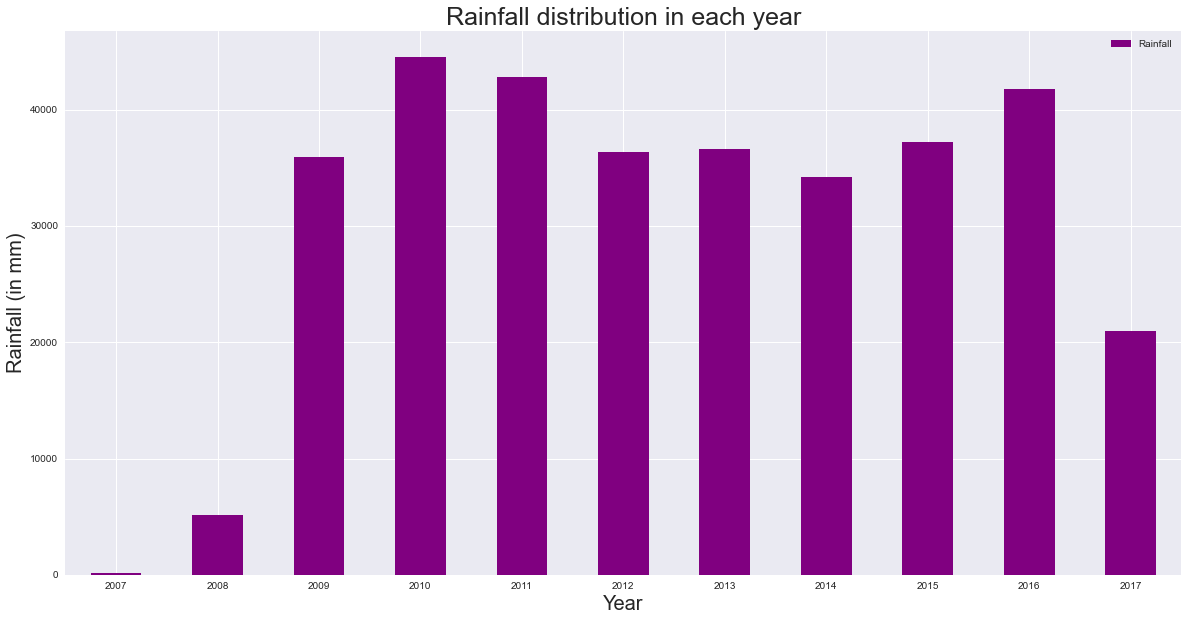

In [20]:
# Rainfall distribution in each year

plt.figure(figsize=(8,4))
a = rain_df.groupby('Year').agg({'Rainfall':'sum'})
a.plot(kind='bar', color='purple')
plt.title('Rainfall distribution in each year', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rainfall (in mm)', fontsize=20)
plt.xticks(rotation=0)

<b>Observation:-</b>

<ul>
    <li>Maximum rainfall(greater than 40,000 mm) occured in 2010 followed by 2011 and 2016.</li>
    <li>2009, 2012, 2013, 2014 and 2015 experienced rainfall between 30,000-40,000 mm.</li>
    <li>Least rainfall(less than 200 mm) occured in 2007 followed by 2008 and 2017(greather than 20,000 mm).</li>
</ul>

Text(0.5, 1.0, 'Wind Direction at 3PM')

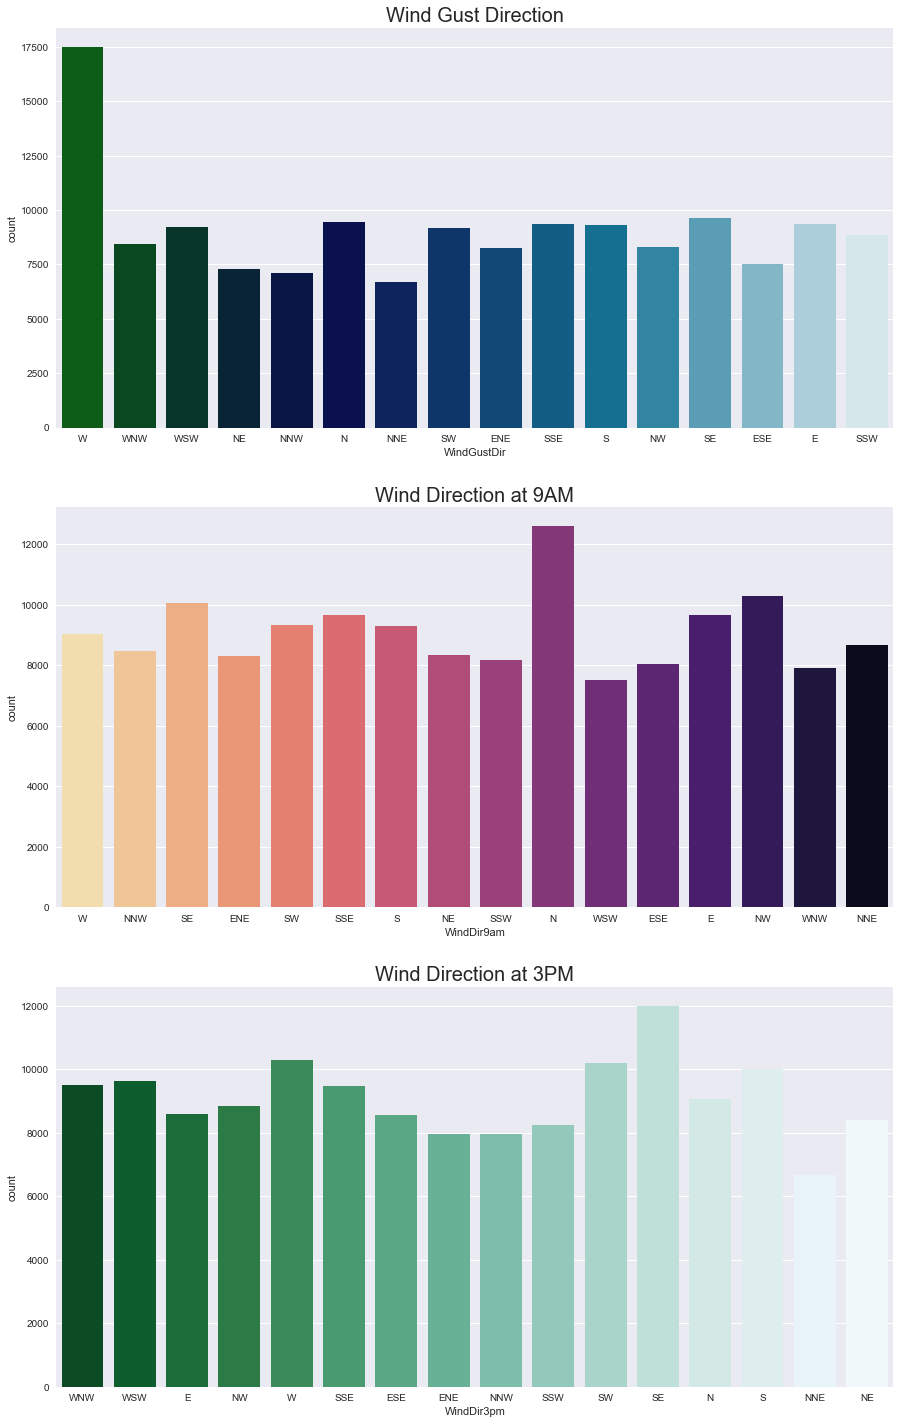

In [21]:
# Distribution of WindGustDir, WindDir9am and WindDir3pm

fig, ax = plt.subplots(3, 1, figsize=(15,25))

# WindGustDir
sns.countplot(df['WindGustDir'], palette='ocean', ax=ax[0])
ax[0].set_title("Wind Gust Direction", fontsize=20)

# WindGustDir
sns.countplot(df['WindDir9am'], palette='magma_r', ax=ax[1])
ax[1].set_title("Wind Direction at 9AM", fontsize=20)

# WindGustDir
sns.countplot(df['WindDir3pm'], palette='BuGn_r', ax=ax[2])
ax[2].set_title("Wind Direction at 3PM", fontsize=20)

<b>Observation:-</b>

<ul>
    <li>Wind Gust Direction for maximum records(nearly 17,500) is West.</li>
    <li>Wind Direction at 9AM for maximum records is North followed by North-West and East.</li>
    <li>Wind Direction at 3PM for maximum records is South East.</li>
</ul>

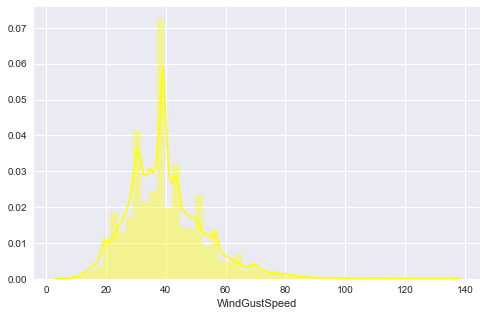

In [22]:
# Distribution of WindGustSpeed

plt.figure(figsize=(8,5))
sns.distplot(df['WindGustSpeed'], hist=True, color='yellow')

<b>Observation:-</b>

<ul>
    <li>Wind Gust Speed ranges from 0 to nearly 140 km/hr.</li>
    <li>Highest concentration of points for Wind Gust Speed is between 38-40 km/hr.</li>
</ul>

Text(0.5, 1.0, 'Temperature at 3PM')

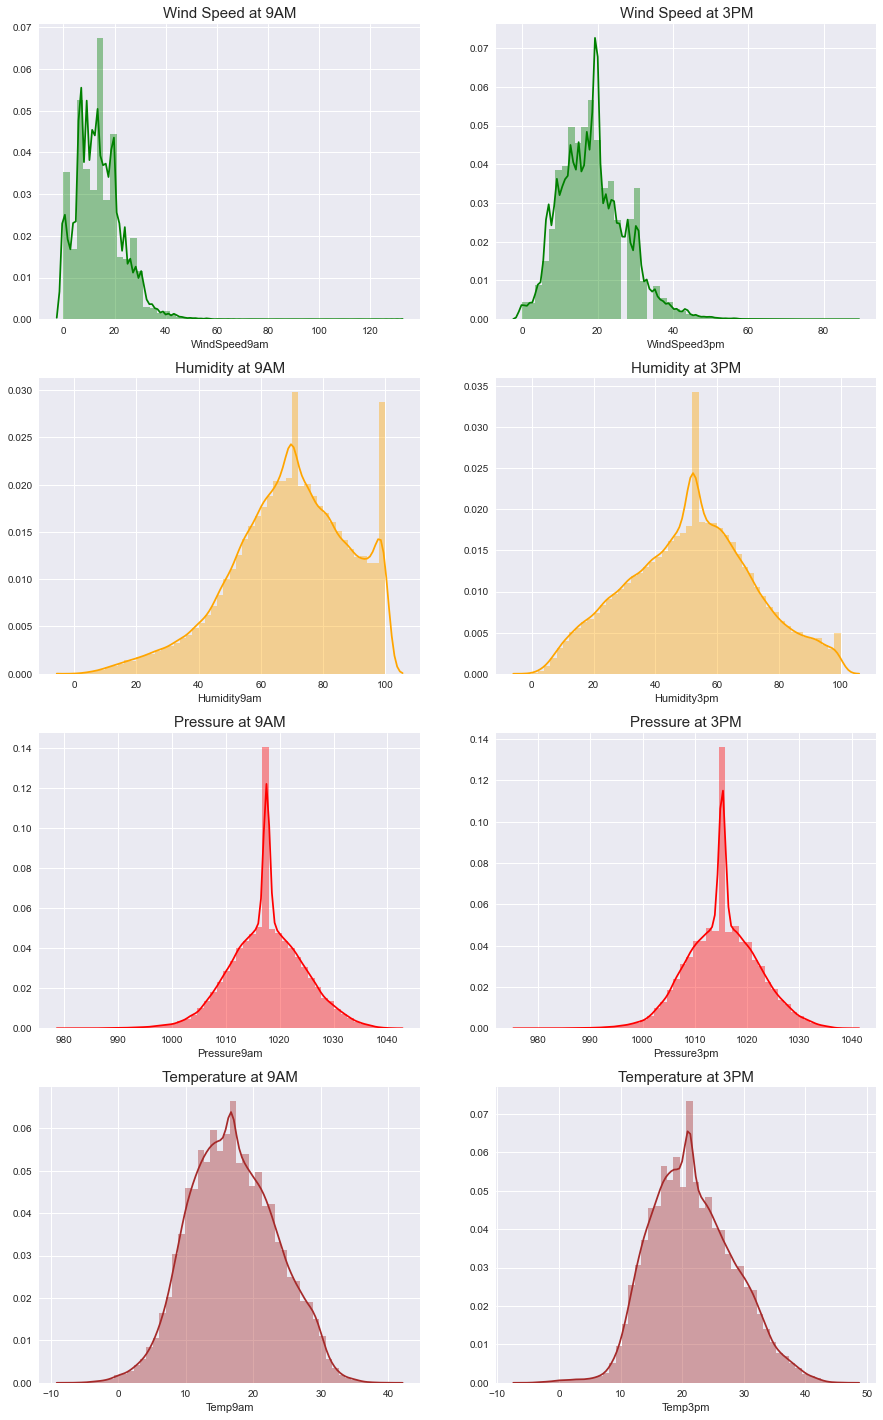

In [23]:
# Distribution of WindSpeed9am, WindSpeed3pm, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm

fig, ax = plt.subplots(4, 2, figsize=(15,25))

# WindSpeed9am
sns.distplot(df['WindSpeed9am'], ax=ax[0,0], color='green')
ax[0,0].set_title("Wind Speed at 9AM", fontsize=15)

# WindSpeed3pm
sns.distplot(df['WindSpeed3pm'], ax=ax[0,1], color='green')
ax[0,1].set_title("Wind Speed at 3PM", fontsize=15)

# Humidity9am
sns.distplot(df['Humidity9am'], ax=ax[1,0], color='orange')
ax[1,0].set_title("Humidity at 9AM", fontsize=15)

# Humidity3pm
sns.distplot(df['Humidity3pm'], ax=ax[1,1], color='orange')
ax[1,1].set_title("Humidity at 3PM", fontsize=15)

# Pressure9am
sns.distplot(df['Pressure9am'], ax=ax[2,0], color='red')
ax[2,0].set_title("Pressure at 9AM", fontsize=15)

# Pressure3pm
sns.distplot(df['Pressure3pm'], ax=ax[2,1], color='red')
ax[2,1].set_title("Pressure at 3PM", fontsize=15)

# Temp9am
sns.distplot(df['Temp9am'], ax=ax[3,0], color='brown')
ax[3,0].set_title("Temperature at 9AM", fontsize=15)

# Temp3pm
sns.distplot(df['Temp3pm'], ax=ax[3,1], color='brown')
ax[3,1].set_title("Temperature at 3PM", fontsize=15)

<b>Observation:-</b>

<ul>
    <li>Maximum wind speed at 9AM ranges from 10 to 20 km/hr whereas at 3PM it ranges from 15 to 22 km/hr.</li>
    <li>Highest concentration of points for humidity at 9AM is between 60-80% whereas at 3PM it's 40-70%.</li>
    <li>Highest concentration of points for pressure at 9AM is between 1015-1018 hpa and at 3PM it's between 1015-1017 hpa.</li>
    <li>Maximum temperature at 9AM is between 16-18 degree Celcius and at 3PM it's between 21-23 degree Celcius.</li>
</ul>

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.]),
 <a list of 7 Text major ticklabel objects>)

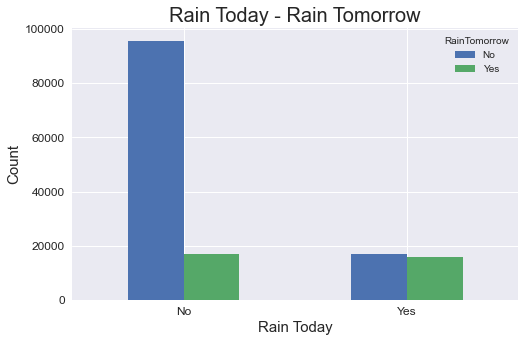

In [24]:
# Analyzing RainToday and RainTomorrow

type_plt = pd.crosstab(df['RainToday'], df['RainTomorrow'])

plt.rcParams["figure.figsize"] = (8,5)

type_plt.plot(kind='bar',stacked=False)

plt.xlabel('Rain Today', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Rain Today - Rain Tomorrow', fontsize=20)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

<b>Observation:-</b>

<ul>
    <li>For maximum records it didn't rain for both days.</li>
    <li>For nearly 20,000 records it didn't rain today but rained tomorrow and rained for both days.</li>
    <li>For nearly 20,000 records it rained today but didn't rain tomorrow.</li>
</ul>

In [25]:
df.head(2)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No


In [26]:
# Encoding categorical variables

def label_encoder(x):
    le = LabelEncoder()
    df[x] = le.fit_transform(df[x])

labels = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
for i in labels:
    label_encoder(i)

## Model

### Split the dataset into training and testing set

In [27]:
# convert datatype of Date in DataFrame
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df['Date'] = df['Date'].apply(lambda x: x.toordinal())

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (116368, 18)
X_test: (29092, 18)
y_train: (116368,)
y_test: (29092,)


### Decision Tree Classifier

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
print("Score of train data:", dt.score(X_train, y_train))
print("Score of test data:", dt.score(X_test, y_test))

Score of train data: 1.0
Score of test data: 0.7834799945002062


In [31]:
y_pred = dt.predict(X_test)
y_pred

array([0, 1, 0, ..., 1, 0, 0])

In [32]:
# F1 score

dt_f1_score = f1_score(y_test, y_pred, average='weighted')
dt_f1_score

0.7838711122874633

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86     22557
           1       0.52      0.52      0.52      6535

    accuracy                           0.78     29092
   macro avg       0.69      0.69      0.69     29092
weighted avg       0.78      0.78      0.78     29092



In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[19374,  3183],
       [ 3116,  3419]], dtype=int64)

In [35]:
# Visualising the graph without the use of graphviz

# plt.figure(figsize = (20,10))
# dec_tree = plot_tree(decision_tree=dt, feature_names=df.columns, filled=True , precision=4, rounded=True)

# import graphviz
# # DOT data
# dot_data = tree.export_graphviz(dt, out_file=None, 
#                                 feature_names=df.columns,
#                                 filled=True)

# # Draw graph
# graph = graphviz.Source(dot_data, format="png") 
# graph

In [36]:
# BaggingClassifier with decision tree

bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, oob_score=True)
bag_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, oob_score=True)

In [37]:
y_pred_bag = bag_clf.predict(X_test)
y_pred_bag

array([0, 0, 0, ..., 0, 0, 0])

In [38]:
# F1 score and accuracy

bag_f1_score = f1_score(y_test, y_pred_bag, average='weighted')
bag_accuracy = accuracy_score(y_test, y_pred_bag)

print("oob score:", bag_clf.oob_score_)
print("F1 Score:", bag_f1_score)
print("Accuracy Score:", bag_accuracy)

oob score: 0.836174893441496
F1 Score: 0.8198405629412336
Accuracy Score: 0.8366217516843119


<b> According to this oob evaluation, this BaggingClassifier is likely to achieve about 83.61% accuracy on the test set. The accuracy of the test set is 83.66%, which is close enough. </b>

In [39]:
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22557
           1       0.73      0.43      0.54      6535

    accuracy                           0.84     29092
   macro avg       0.79      0.69      0.72     29092
weighted avg       0.83      0.84      0.82     29092



Text(0.5, 1.0, 'Accuracy Score: 0.8366217516843119')

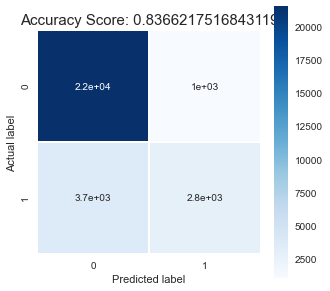

In [40]:
cm = confusion_matrix(y_test, y_pred_bag)

plt.figure(figsize=(5,5))

sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')

plt.ylabel('Actual label')
plt.xlabel('Predicted label')

all_sample_title = 'Accuracy Score: {0}'.format(bag_clf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

<b>Bagging increased the accuracy of Decision Tree Classifier.</b>

### Ensemble Learning

In [41]:
log = LogisticRegression()
rf = RandomForestClassifier()
svm = SVC()

voting_clf = VotingClassifier(estimators=[('lr', log), ('rf', rf), ('svc', svm)], voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [42]:
# Each classifiers accuracy on test set

for clf in (log, rf, svm, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.7753677987075485
RandomForestClassifier 0.8526742747146981
SVC 0.7753677987075485
VotingClassifier 0.7753677987075485


In [43]:
y_pred_voting = voting_clf.predict(X_test)
y_pred_voting

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
# F1 score and accuracy

voting_f1_score = f1_score(y_test, y_pred_voting, average='weighted')
voting_accuracy = accuracy_score(y_test, y_pred_voting)

print("F1 Score:", voting_f1_score)
print("Accuracy Score:", voting_accuracy)

F1 Score: 0.677262732499997
Accuracy Score: 0.7753677987075485


In [45]:
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     22557
           1       0.00      0.00      0.00      6535

    accuracy                           0.78     29092
   macro avg       0.39      0.50      0.44     29092
weighted avg       0.60      0.78      0.68     29092



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


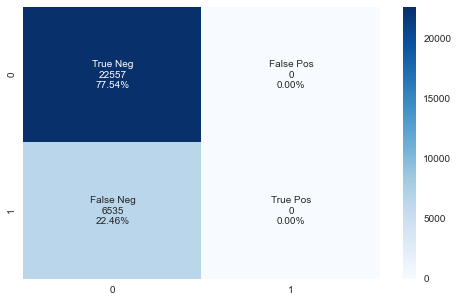

In [51]:
cm = confusion_matrix(y_test, y_pred_voting)

group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

<b> VotingClassifier gives an accuracy of 77.53%.</b>